In [1]:
import sys
!{sys.executable} -m pip install sklearn

Why k-means clustering?

A critical drawback of hierarchical clustering: runtime
K means runs significantly fater on large datasets

K-means clustering

Generate cluster centers
Generate cluster labels

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_excel("Final_Data.xlsx")

In [6]:
df

,Unnamed: 0,Trial,Unnamed: 1,Vision,Surface,Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],...,Max_COPx,Min_COPy,Coeff_stab,Fx/Fz,Fy/Fz,Section,Min_COPx,Max_COPy,Ecart_COPx,Ecart_COPy
0,0,BDS00001,1,Open,Firm,-1.732227,-3.811173,537.878822,5.218416,43.218262,...,-7.353309,0.612749,4.186365,-0.003220,-0.007086,1.402341,-9.029349,1.449448,1.676040,0.836699
1,1,BDS00002,2,Open,Firm,-1.627292,-4.235726,535.285603,2.955367,41.121174,...,-6.638454,0.140214,4.537560,-0.003040,-0.007913,1.814866,-8.891325,0.945793,2.252871,0.805579
2,2,BDS00003,3,Open,Firm,-1.566174,-4.603948,534.938451,2.289978,42.048856,...,-7.285561,0.058207,4.863048,-0.002928,-0.008607,0.771987,-8.504962,0.691294,1.219401,0.633087
3,3,BDS00004,4,Closed,Firm,1.843765,-4.005788,531.874216,3.239688,36.531572,...,-6.302602,0.304533,4.409739,0.003467,-0.007531,0.736278,-7.331580,1.020076,1.028978,0.715543
4,4,BDS00005,5,Closed,Firm,6.367666,-0.937484,529.691440,2.962939,40.596105,...,-6.513514,0.077692,6.436307,0.012021,-0.001770,2.270045,-8.636317,1.147054,2.122803,1.069362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,1925,BDS01952,1952,Open,Firm,3.174549,-1.001979,596.685518,-3.710568,20.626669,...,-2.535988,-1.566533,3.328922,0.005320,-0.001679,3.468627,-4.243281,0.465120,1.707293,2.031653
1926,1926,BDS01953,1953,Open,Firm,3.720797,-0.652582,604.082145,11.280193,3.317428,...,1.320540,-0.177615,3.777591,0.006159,-0.001080,20.590946,-3.168618,4.409202,4.489158,4.586817
1927,1927,BDS01954,1954,Closed,Foam,3.619168,-0.748002,603.889774,11.068182,3.850692,...,1.617617,-0.107581,3.695657,0.005993,-0.001239,22.173199,-3.947808,3.876517,5.565425,3.984098
1928,1928,BDS01955,1955,Closed,Foam,3.583329,-1.996067,602.771959,6.272222,2.838580,...,1.770444,-1.406208,4.101772,0.005945,-0.003311,22.322751,-2.846596,3.428654,4.617040,4.834862


In [4]:
df['Vision'].replace(['Open', 'Closed'], [1, 0], inplace=True)
df['Surface'].replace(['Firm', 'Foam'], [1, 0], inplace=True)

In [5]:
df.head()

,Unnamed: 0,Trial,Unnamed: 1,Vision,Surface,Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],...,Max_COPx,Min_COPy,Coeff_stab,Fx/Fz,Fy/Fz,Section,Min_COPx,Max_COPy,Ecart_COPx,Ecart_COPy
0,0,BDS00001,1,1,1,-1.732227,-3.811173,537.878822,5.218416,43.218262,...,-7.353309,0.612749,4.186365,-0.003220,-0.007086,1.402341,-9.029349,1.449448,1.676040,0.836699
1,1,BDS00002,2,1,1,-1.627292,-4.235726,535.285603,2.955367,41.121174,...,-6.638454,0.140214,4.537560,-0.003040,-0.007913,1.814866,-8.891325,0.945793,2.252871,0.805579
2,2,BDS00003,3,1,1,-1.566174,-4.603948,534.938451,2.289978,42.048856,...,-7.285561,0.058207,4.863048,-0.002928,-0.008607,0.771987,-8.504962,0.691294,1.219401,0.633087
3,3,BDS00004,4,0,1,1.843765,-4.005788,531.874216,3.239688,36.531572,...,-6.302602,0.304533,4.409739,0.003467,-0.007531,0.736278,-7.331580,1.020076,1.028978,0.715543
4,4,BDS00005,5,0,1,6.367666,-0.937484,529.691440,2.962939,40.596105,...,-6.513514,0.077692,6.436307,0.012021,-0.001770,2.270045,-8.636317,1.147054,2.122803,1.069362


transforming the outputs into numerical data

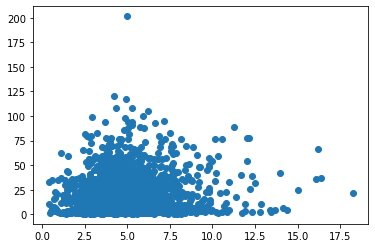

In [29]:
plt.scatter(df["Coeff_stab"],df["Section"])

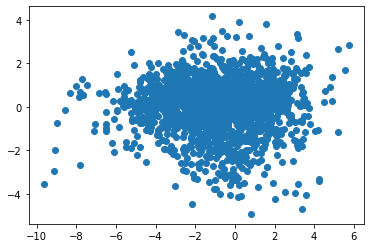

In [11]:
plt.scatter(df["COPx[cm]"],df["COPy[cm]"])

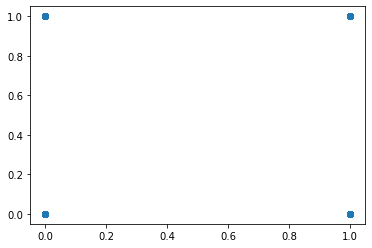

In [12]:
plt.scatter(df["Vision"],df["Surface"])

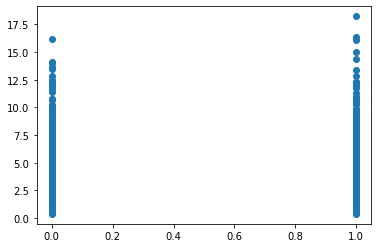

In [13]:
plt.scatter(df["Vision"],df["Coeff_stab"])

PCA Projection to 2D:on va transformer les features: Coeff stab, Section, COPx, COPy en 2D selon la vision et la surface 


In [6]:
features = ['Coeff_stab','Section', 'COPx[cm]', 'COPy[cm]']
x = df.loc[:, features].values
y = df.loc[:,['Surface',"Vision"]].values

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pd.DataFrame(data = x, columns = features).head()

,Coeff_stab,Section,COPx[cm],COPy[cm]
0,-0.265416,-0.878199,-3.350621,0.796850
1,-0.096661,-0.857526,-3.185098,0.449539
2,0.059742,-0.909788,-3.268787,0.346501
3,-0.158081,-0.911577,-2.803366,0.496899
4,0.815721,-0.834715,-3.176691,0.455522


In [9]:
pca = PCA(n_components=2)

In [10]:
principalComponents = pca.fit_transform(x)

In [11]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [12]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.897782,0.496654
1,-2.644184,0.785136
2,-2.645928,0.945012
3,-2.478884,0.595304
4,-2.260729,0.964858


In [13]:
finalDf = pd.concat([principalDf, df[['Vision',"Surface"]]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Vision,Surface
0,-2.897782,0.496654,1,1
1,-2.644184,0.785136,1,1
2,-2.645928,0.945012,1,1
3,-2.478884,0.595304,0,1
4,-2.260729,0.964858,0,1


Visualize 2D Projection


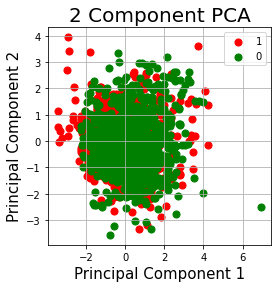

In [15]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
Surface = [1, 0]
colors = ['r', 'g']
for target, color in zip(Surface,colors):
    indicesToKeep = finalDf['Surface'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Surface)
ax.grid()

Suface=f(pca1,pca2)

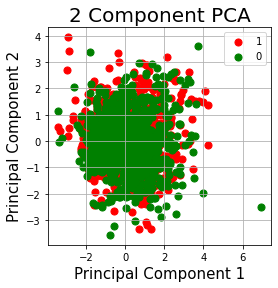

In [16]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
Vision = [1, 0]
colors = ['r', 'g']
for target, color in zip(Vision,colors):
    indicesToKeep = finalDf['Vision'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Vision)
ax.grid()

Vision=f(pca1,pca2)

In [25]:
finalDf
finalDf.to_excel("fffffff.xlsx")

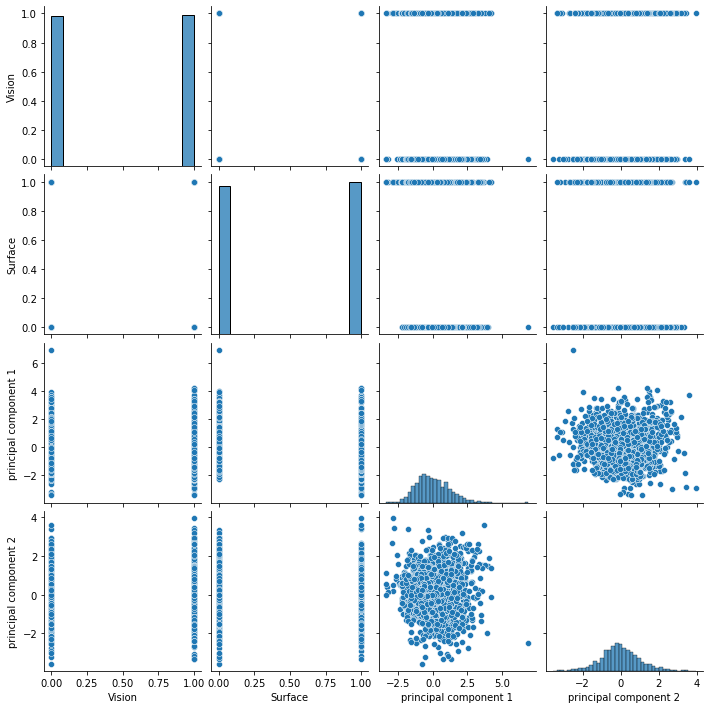

In [19]:
sns.pairplot(finalDf[['Vision','Surface', 'principal component 1','principal component 2']])

#Plot vision, Surface,pca1 and pca2 Correlation

Perform K-Mean Clustering with 4 Clusters :USING CLUSTERS

In [35]:
import sklearn.cluster as cluster


In [54]:
# We will use 4 Variables for this example et 4 classes
kmeans = cluster.KMeans(n_clusters=4 ,init="k-means++")
kmeans = kmeans.fit(finalDf[['principal component 1','principal component 2',"Vision","Surface"]])

In [55]:
kmeans.cluster_centers_

array([[-0.74521599,  0.79332459,  0.51730769,  0.66153846],
       [ 1.55151326,  1.07558916,  0.49158249,  0.40740741],
       [ 0.89825344, -0.84284965,  0.48103792,  0.35728543],
       [-0.85508512, -0.50606388,  0.51143791,  0.54248366]])

Attach Clusters to the Original Data¶

In [56]:
finalDf['Clusters'] = kmeans.labels_

In [57]:
finalDf

,principal component 1,principal component 2,Vision,Surface,Clusters
0,-2.897782,0.496654,1,1,0
1,-2.644184,0.785136,1,1,0
2,-2.645928,0.945012,1,1,0
3,-2.478884,0.595304,0,1,0
4,-2.260729,0.964858,0,1,0
...,...,...,...,...,...
1925,-1.404962,0.825528,1,1,0
1926,-0.346499,-1.558043,1,1,3
1927,-0.330455,-1.530757,0,0,3
1928,-0.064944,-0.922590,0,0,2


In [58]:
finalDf['Clusters'].value_counts()

3    613
0    520
2    500
1    297
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

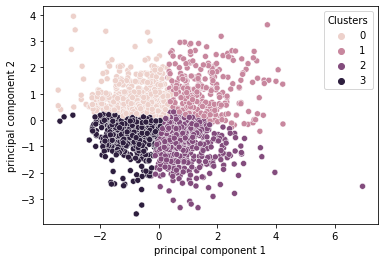

In [59]:
sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=finalDf)

Can we predict using clustering?

In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.
Clustering is a broad set of techniques for finding subgroups of observations within a data set.
K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst.
In k-means clustering, each cluster is represented by its center (centroid) which corresponds to the mean of points assigned to the cluster.

Elbow Plot :

In [45]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(finalDf[['principal component 1','principal component 2']])
    sse.append(km.inertia_)

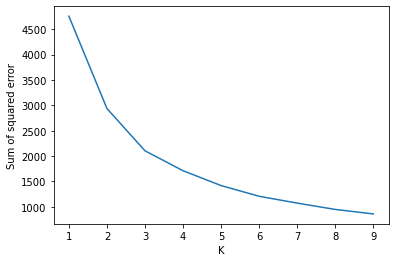

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Recall that, the basic idea behind cluster partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation (known as total within-cluster variation or total within-cluster sum of square)

Silhouette Method to Indentify Clusters :

In [61]:
import sklearn.metrics as metrics

In [66]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(finalDf,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.1928019220775926
Silhouette score for k(clusters) = 4 is 0.3512504787961674
Silhouette score for k(clusters) = 5 is 0.26054634192625825
Silhouette score for k(clusters) = 6 is 0.19679067754249885
Silhouette score for k(clusters) = 7 is 0.179655263356627
Silhouette score for k(clusters) = 8 is 0.1325344392923272
Silhouette score for k(clusters) = 9 is 0.18357377048359347
Silhouette score for k(clusters) = 10 is 0.15307546363119814
Silhouette score for k(clusters) = 11 is 0.16910120728306136
Silhouette score for k(clusters) = 12 is 0.10111274277022422


Max Silhouette Score as k = 4, Hence 4 Clusters is the right option

Perform K-Mean Clustering with 4 Clusters :

In [67]:
kmeans = cluster.KMeans(n_clusters=4 ,init="k-means++")
kmeans = kmeans.fit(finalDf[['principal component 1','principal component 2',"Vision","Surface"]])

In [68]:
finalDf['Clusters'] = kmeans.labels_


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

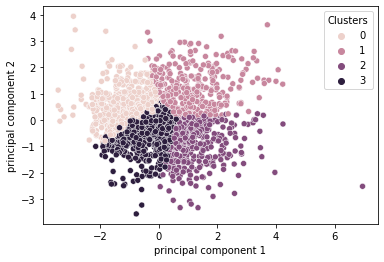

In [69]:
sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=finalDf)

The K-means clustering with 4 clusters is already performed

Accuracy of K-means clustering :

As k-means is a clustering method (not classification), the accuracy should not be evaluated. This is because we do not train the model with class label data and therefore there will be inconsistency in between true class labels and predicted class labels. You may compare the scatterplot of original dataset and scatterplot after k-means clustering for evaluating the performance of k-means clustering.

K-means clustering limitation :

In k-means clustering, it is essential to provide the number of clusters to form from the data. If the dataset is well-separated, it would be easy to identify the optimal number of clusters using the elbow method. But, if the data is not well-separated, it would be difficult to find the optimal number of clusters.

k-means clustering is not applicable to the categorical data as it’s prototype is based on the centroid. If you have categorical data, it is better to use k-medoids (Partition Around Medoids - PAM) clustering method. In k-medoids, the prototype is medoid (most representative data point for a cluster).